<a href="https://colab.research.google.com/github/codeplinth/pandasbootcamp/blob/master/Pandas_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls "/content/drive/My Drive/data/Sales_Data"

Sales_April_2019.csv	 Sales_January_2019.csv  Sales_May_2019.csv
Sales_August_2019.csv	 Sales_July_2019.csv	 Sales_November_2019.csv
Sales_December_2019.csv  Sales_June_2019.csv	 Sales_October_2019.csv
Sales_February_2019.csv  Sales_March_2019.csv	 Sales_September_2019.csv


In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/Sales_Data/Sales_April_2019.csv')

In [ ]:
filelist = [file for file in os.listdir('/content/drive/My Drive/data/Sales_Data/')]
for f in filelist:
  print(f)

Sales_October_2019.csv
Sales_April_2019.csv
Sales_June_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_May_2019.csv
Sales_December_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv


In [ ]:
all_months_data = pd.DataFrame()
for f in filelist:
  df = pd.read_csv('/content/drive/My Drive/data/Sales_Data/'+f)
  all_months_data = pd.concat([all_months_data,df])

In [ ]:
all_months_data.to_csv('all_data.csv',index=False)

In [ ]:
all_data = pd.read_csv('all_data.csv')
all_data.shape

(186850, 6)

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [ ]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [ ]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [ ]:
sales_by_month = all_data.groupby('Month').sum()

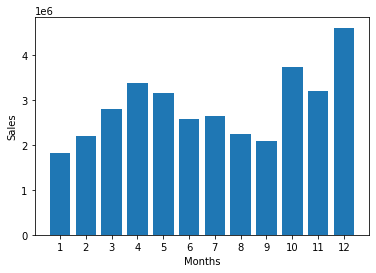

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13,1)
plt.bar(months,sales_by_month['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [ ]:
all_data['Purchase Address']

0                   609 Cherry St, Dallas, TX 75001
1                 225 5th St, Los Angeles, CA 90001
2              967 12th St, New York City, NY 10001
3         628 Jefferson St, New York City, NY 10001
4                534 14th St, Los Angeles, CA 90001
                            ...                    
186845      868 Hickory St, San Francisco, CA 94016
186846            206 Lakeview St, Boston, MA 02215
186847               568 13th St, Seattle, WA 98101
186848       495 Walnut St, San Francisco, CA 94016
186849           738 Park St, Los Angeles, CA 90001
Name: Purchase Address, Length: 185950, dtype: object

In [ ]:
def get_city(address):
  return address.split(',')[1]
def get_state(address):
  return address.split(',')[2].split(' ')[1]

In [ ]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)


In [ ]:
sales_by_city = all_data.groupby('City').sum()
sales_by_city.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06


In [ ]:
sales_by_city['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

In [ ]:
cities = [city for city,df in all_data.groupby('City')]

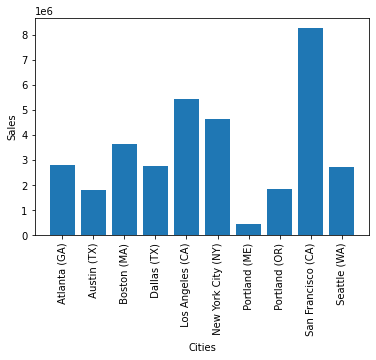

In [ ]:
plt.bar(cities,sales_by_city['Sales'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)


In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10


In [ ]:
hours = [hour for hour,df in all_data.groupby(['Hour'])]

In [ ]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


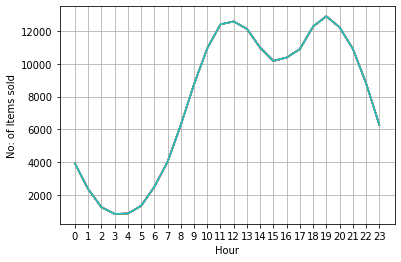

In [ ]:
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No: of Items sold')
plt.grid()
plt.show()

In [ ]:
df = all_data.loc[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles (CA),8,54
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles (CA),8,54
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco (CA),4,53
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco (CA),4,53
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles (CA),9,47
...,...,...,...,...,...,...,...,...,...,...,...
186785,248088,Bose SoundSport Headphones,1,99.99,2019-08-13 19:26:00,"614 11th St, San Francisco, CA 94016",8,99.99,San Francisco (CA),19,26
186802,248105,Google Phone,1,600.00,2019-08-28 19:27:00,"21 Center St, New York City, NY 10001",8,600.00,New York City (NY),19,27
186803,248105,Wired Headphones,1,11.99,2019-08-28 19:27:00,"21 Center St, New York City, NY 10001",8,11.99,New York City (NY),19,27
186818,248120,Google Phone,1,600.00,2019-08-02 20:42:00,"619 5th St, New York City, NY 10001",8,600.00,New York City (NY),20,42


In [ ]:
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [ ]:
product_group = all_data.groupby(['Product']).sum()
product_group

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [ ]:
products = [prod for prod,df in all_data.groupby(['Product'])]
qty_ordered = product_group['Quantity Ordered']

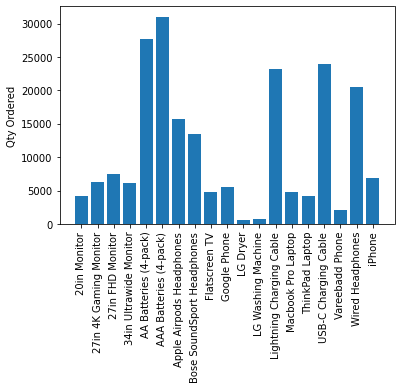

In [ ]:
plt.bar(products,qty_ordered)
plt.xticks(products,rotation='vertical')
plt.ylabel('Qty Ordered')
plt.show()

In [ ]:
prices = all_data.groupby(['Product']).mean()['Price Each']

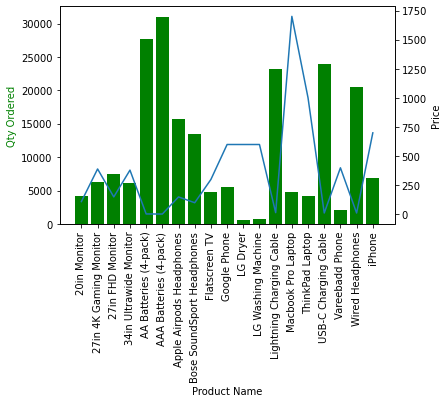

In [ ]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,qty_ordered,color='g')
ax2.plot(products,prices)
ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products,rotation='vertical')
ax1.set_ylabel('Qty Ordered',color='g')
ax2.set_ylabel('Price')
plt.show()